In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [ ]:
raw_2019_df = te.getHistoricalEurostat(ID = '86520', initDate = '2019-01-01', endDate = '2019-12-31', output_type = 'df')
raw_2020_df = te.getHistoricalEurostat(ID = '86520', initDate = '2020-01-01', endDate = '2020-12-31', output_type = 'df')


In [4]:
Months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

df_2019 = raw_2019_df[['Date', 'Value']].rename(columns={'Date':'Order','Value': '2019'}).sort_values(by='Order', ascending=True)
df_2019['Months'] = Months


df_2020 = raw_2020_df[['Date', 'Value']].rename(columns={'Date':'Order','Value': '2020'}).sort_values(by='Order', ascending=True)
df_2020['Months'] = Months

df_2019.set_index('Months', inplace=True)
df_2020.set_index('Months', inplace=True)

df = pd.merge(df_2019,df_2020, on='Months')
del df['Order_x']
del df['Order_y']
df

,2019,2020
Months,,
January,103.71,106.12
February,104.09,106.41
March,104.10,106.57
April,104.51,111.39
May,104.65,110.35
June,104.75,108.85
July,105.18,108.61
August,105.25,108.72
September,105.32,108.62


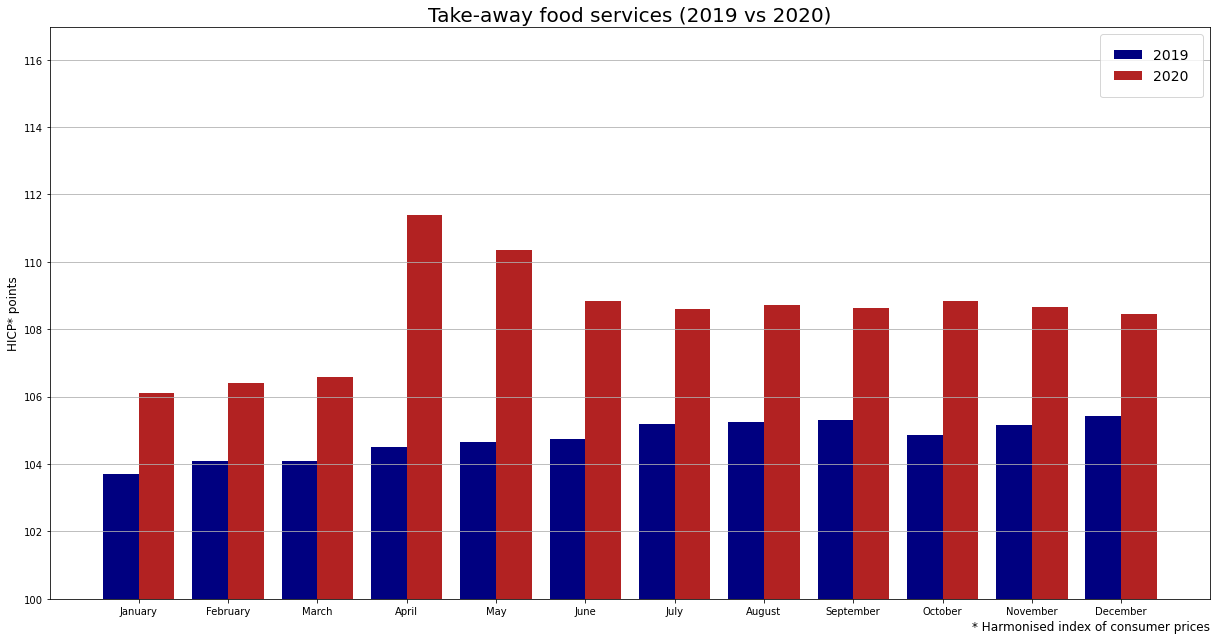

In [47]:
labels = df.index.tolist()
values_2019 = df['2019'].values.tolist()
values_2020 = df['2020'].values.tolist()

x = np.arange(len(labels))  
width = 0.40 


fig, ax = plt.subplots(figsize=(17, 9))
rects1 = ax.bar(x - width/2, values_2019, width, label='2019',color='navy')
rects2 = ax.bar(x + width/2, values_2020, width, label='2020', color='firebrick')

ax.set_xlabel('* Harmonised index of consumer prices', loc='right', size=12)
ax.set_ylabel('HICP* points', size=12)
ax.set_title('Take-away food services (2019 vs 2020)', size=20)

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(fontsize=14,
          borderpad=1)

ax.set_ylim(ymin=100)

fig.tight_layout()

ax.yaxis.grid(zorder=0)
plt.show()